In [8]:
import control as ct
import serial 
import numpy as np
import matplotlib.pyplot as plt
import time as t
import pandas as pd
from scipy.signal import square,sawtooth


Estabelecendo conexão.

Iniciando coleta.

Fim da coleta.
media= -0.05

Período real: 0.021469780921936035
Nivel_DC: 2.425525


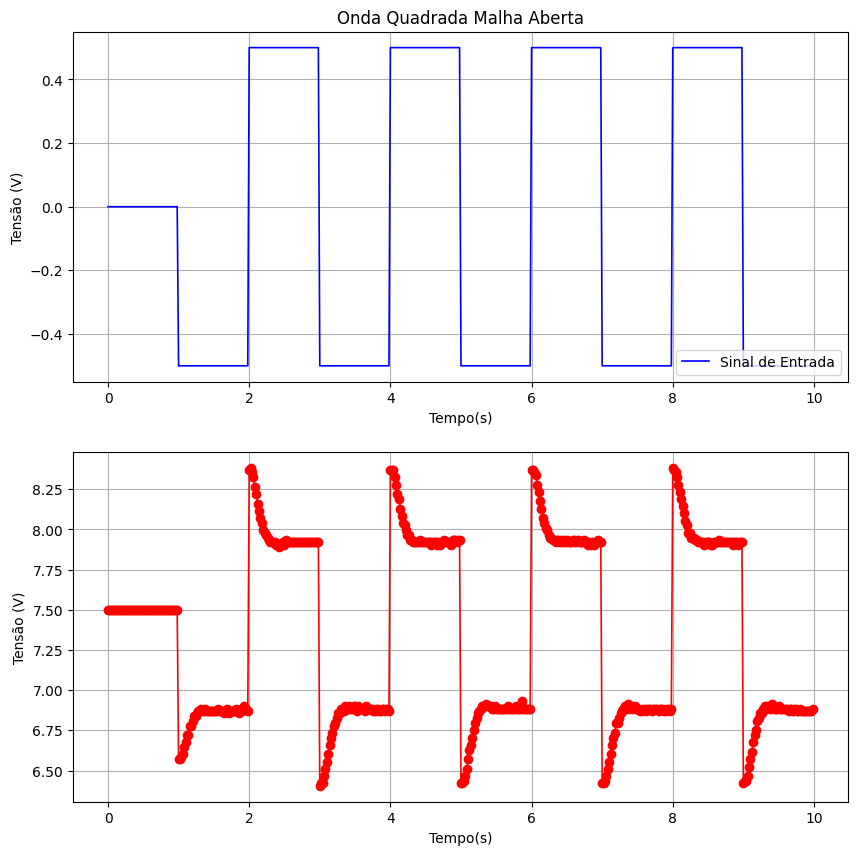

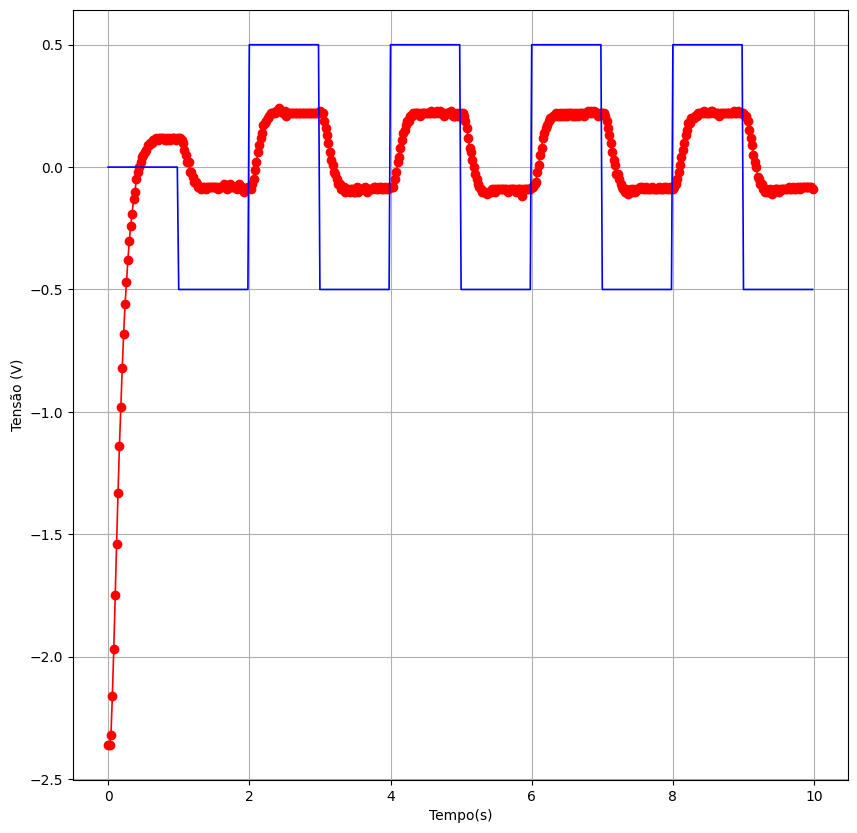

In [31]:
amplitude_maxima = 15                                                             # Tensão da bancada

numAmostras = 500                             
tempo = np.zeros(numAmostras)                    
y = np.zeros(numAmostras)                      

Ts = 0.02                                          

fre = 0.5                                                                         # Frequência 
Amplitude = 0.5                                                                   # Amplitude
ponto_de_operacao = 7.5                                                            # Ponto de operação

nivel_dc_saida = 2.36                                                            # Nível dc   


# a = 2*np.ones(int(numAmostras/2))
# b = 4*np.ones(int(numAmostras/2))
# u = np.concatenate([a,b]) #degrau
r = np.zeros(numAmostras)                    
u = np.zeros(numAmostras)                    

toc = np.zeros(numAmostras)                     
###################################################################################################################################################                     



for n in range(numAmostras):
    #r[n] = prbs[n] 
  r[n] = Amplitude*square(2*np.pi*fre*n*Ts) 
    # r[n] = Amplitude*sawtooth(2*np.pi*fre*n*Ts) + setpoint
    # r[n] = Amplitude*np.sin(2*np.pi*fre*n*Ts) + setpoint
    # r[n] = u[n]

print('\nEstabelecendo conexão.')
conexao = serial.Serial(port='COM16', baudrate=9600, timeout=0.005)

t.sleep(1)
print('\nIniciando coleta.')

#for n in range(numAmostras):                                                                 
 # r[n] = Amplitude*square(2*np.pi*fre*n*Ts) #+ ponto_de_operacao
  #r[n] = Amplitude*sawtooth(2*np.pi*fre*n*Ts) + setpoint
  #r[n] = Amplitude*np.sin(2*np.pi*fre*n*Ts) + setpoint
  #r[n] = u[n]
    
#print('\nEstabelecendo conexão.')                                      
#conexao = serial.Serial(port='COM10', baudrate=9600, timeout=0.005)                        

#t.sleep(1)                                                       
#print('\nIniciando coleta.')                                                  

##_____________ Loop principal de controle _____________##
nivel_dc_entrada = ponto_de_operacao                                                                                                                            
Kp = 1.5                                                                        # VALOR DO KP
for n in range(numAmostras):                                               
    tic = t.time()                                               

    if (conexao.inWaiting() > 0):                                     
        y[n] = conexao.readline().decode()                                                     

    # remove o nivel_dc_saida
    sinal_medido = y[n] - nivel_dc_saida                                                            
    
    # calcula o erro
    e = r[n] - sinal_medido                                     

    # primeiras 50 amostras
    if (n<50):                                           
      u[n] = nivel_dc_entrada                                           
      r[n] = 0.0                                                    
    else:                                                                                                                          
      u[n] = (Kp*e) + nivel_dc_entrada                                               

    if (u[n] > amplitude_maxima):                                    
      sinal_PWM = 255                                 
    else:                                                              
      sinal_PWM = ((u[n])*255)/amplitude_maxima                                                 

    # sinal_PWM deve ser um número inteiro entre 0 e 255                                                     
    conexao.write(str(round(sinal_PWM)).encode())                                                                   
    
    t.sleep(Ts)                                                        
    
    if (n > 0):                                                   
        tempo[n] = tempo[n-1] + Ts                         
    toc[n] = t.time() - tic                        

conexao.write('0'.encode())                                            
print('\nFim da coleta.')                                               
conexao.close()                                  

print('media=',np.mean(r))                                                                    

print('\nPeríodo real:', np.mean(toc))                         
print('Nivel_DC:', np.mean(y[tempo>2]))                                              

plt.figure(figsize=(10,10))                                         
plt.subplot(211)                                                                  
plt.plot(tempo,r,'-b',linewidth=1.2)                                         
plt.xlabel('Tempo(s)')                                                       
plt.ylabel('Tensão (V)')                        
plt.grid()                                                                         
plt.title('Onda Quadrada Malha Aberta')                                          
plt.legend(loc='lower right', labels=('Sinal de Entrada','Sinal de Saída'))                                
                        
plt.subplot(212)                             
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)                         
plt.plot(tempo,u,'-ro',linewidth=1.2)                   
plt.xlabel('Tempo(s)')                        
plt.ylabel('Tensão (V)')                                                            
plt.grid()                                                     
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()                                                                   
                
plt.figure(figsize=(10,10))                                 
#plt.plot(tempo,r,'-b',tempo,y,'-r',linewidth=1.2)
plt.plot(tempo,y-nivel_dc_saida,'-ro', tempo, r,'-b',linewidth=1.2)                                   
plt.xlabel('Tempo(s)')                                                                                                                                           
plt.ylabel('Tensão (V)')                                                                      
plt.grid()                                                                    
# plt.title('Tensão de Saída - Malha Aberta')
plt.show()                                    
              
#dados=np.stack((tempo,r,y, u),axis=-1)                                                                                                                   
#np.savetxt("C:/Users/User/Documents/2023.2/Laboratório de Controle/08-05/dados/dadoskp.csv", dados, delimiter=";")  
#np.savetxt("C:/Users/User/Documents/2023.2/Laboratório de Controle/relatório_6/dadosP.csv", dados, delimiter=";")
                                 
